In [74]:
import matplotlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
block = np.ones((10,10))
block[1, 1] = 0
block[4, 1] = 0
block[1:5, 2] = 0
block[1:5, 3] = 0
block[6:9, 3] = 0
block[1:3, 4] = 0
block[6:9, 4] = 0
block[6:9, 5] = 0
block[2:5, 6] = 0
block[7:10, 6] = 0
block[2:5, 7] = 0
block[1:7, 8] = 0
block[1:4, 9] = 0
n_block = block.copy()

In [76]:
d = [(1, 0), (-1, 0), (0, 1), (0, -1)]
def detected(p, r, c, d):
#point、row、column、direction
    block[r,c] = 1
    for r_d, c_d in d:
        new_r = r + r_d
        new_c = c + c_d
        if new_r > 9 or new_c > 9 or new_r < 0 or new_c < 0:
            continue
        if block[new_r, new_c] == 0 :
            detected(block, new_r, new_c, d)

In [77]:
n = 0
island_s = []
island_n = []
island = []
for y in range(10):
    for x in range(10):
        if block[x, y] == 0:
            p = block[x, y]
            detected(p, x, y, d)
            island_s.append(np.sum(block) - np.sum(n_block))
            island.append(block - n_block)
            n_block = block.copy()  
            n += 1
            island_n.append(n)
print('The number of islands are ' + str(n))
print(island_s)
print(island_n)

The number of islands are 3
[12.0, 12.0, 15.0]
[1, 2, 3]


Island size is 12.0


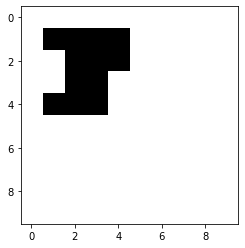


Island size is 12.0


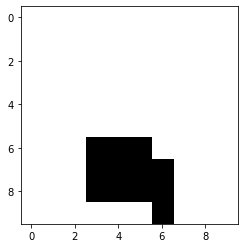


Island size is 15.0


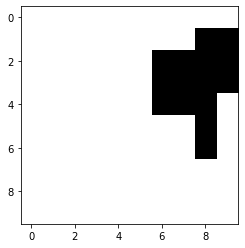

In [79]:
for i in range(len(island_s)) :
    s = island_s[i]
    shape = island[i] * 255
    new_shape = np.ones((block.shape[0], block.shape[1])) * 255
    print('Island size is ' + str(island_s[i]))
    plt.imshow(new_shape - shape, cmap=plt.cm.gray)
    plt.show()
    print()